## **<h3 align="center"> Computational Intelligence for Optimization</h3>**
# **<h3 align="center">Evaluation Grid Search 2 </h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Julia Karpienia  - 20240514@novaims.unl.pt - 20240514<br>
Steven Carlson - 20240554@novaims.unl.pt - 20240554 <br>
Tim Straub - 20240505@novaims.unl.pt - 20240505

<a id = "toc"></a>

##  Table of Contents

1. [Introduction](#intro)
2. [Import & Setup](#import_setup)
3. [Loading Results](#load_results)
4. [Statistical Significance Tests](#top_configs)
5. [Analyzing Top Configurations](#top_config)
   - 5.1. [Top by Median Fitness](#top_median_fitness)
   - 5.2. [Top by Standard Deviation Fitness](#top_std_fitness)
   - 5.3. [Boxplot of Best Fitness](#boxplot_best_fit)
6. [Final Best Configuration](#final_config)



#  1. Introduction <a class="anchor" id="intro"></a> 
[Back to ToC](#toc)<br>

In this notebook, we evaluate the results from our second grid search experiment for optimizing a Genetic Algorithm. Our objective is to identify robust hyperparameter configurations that consistently lead to optimal or near-optimal solutions across multiple runs.


# 2. Import & Setup <a class="anchor" id="import_setup"></a>

[Back to ToC](#toc)<br>

This section loads all required packages, functions, and disables unnecessary warnings for clean output.

In [11]:
# Let's load the functions created in evaluation.py
from Operators.evaluation import *

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 3. Loading Results <a class="anchor" id="load_results"></a>

[Back to ToC](#toc)<br>

Here, we load the convergence logs and summary CSV from the second grid search. 

In [12]:
fitness_path = "fitness_logs_gs2"
summary_path = "ga_summary_gs2.csv"

In [13]:
fitness_dfs = load_fitness_logs(fitness_path)

Loaded 9 configurations from 'fitness_logs_gs2'


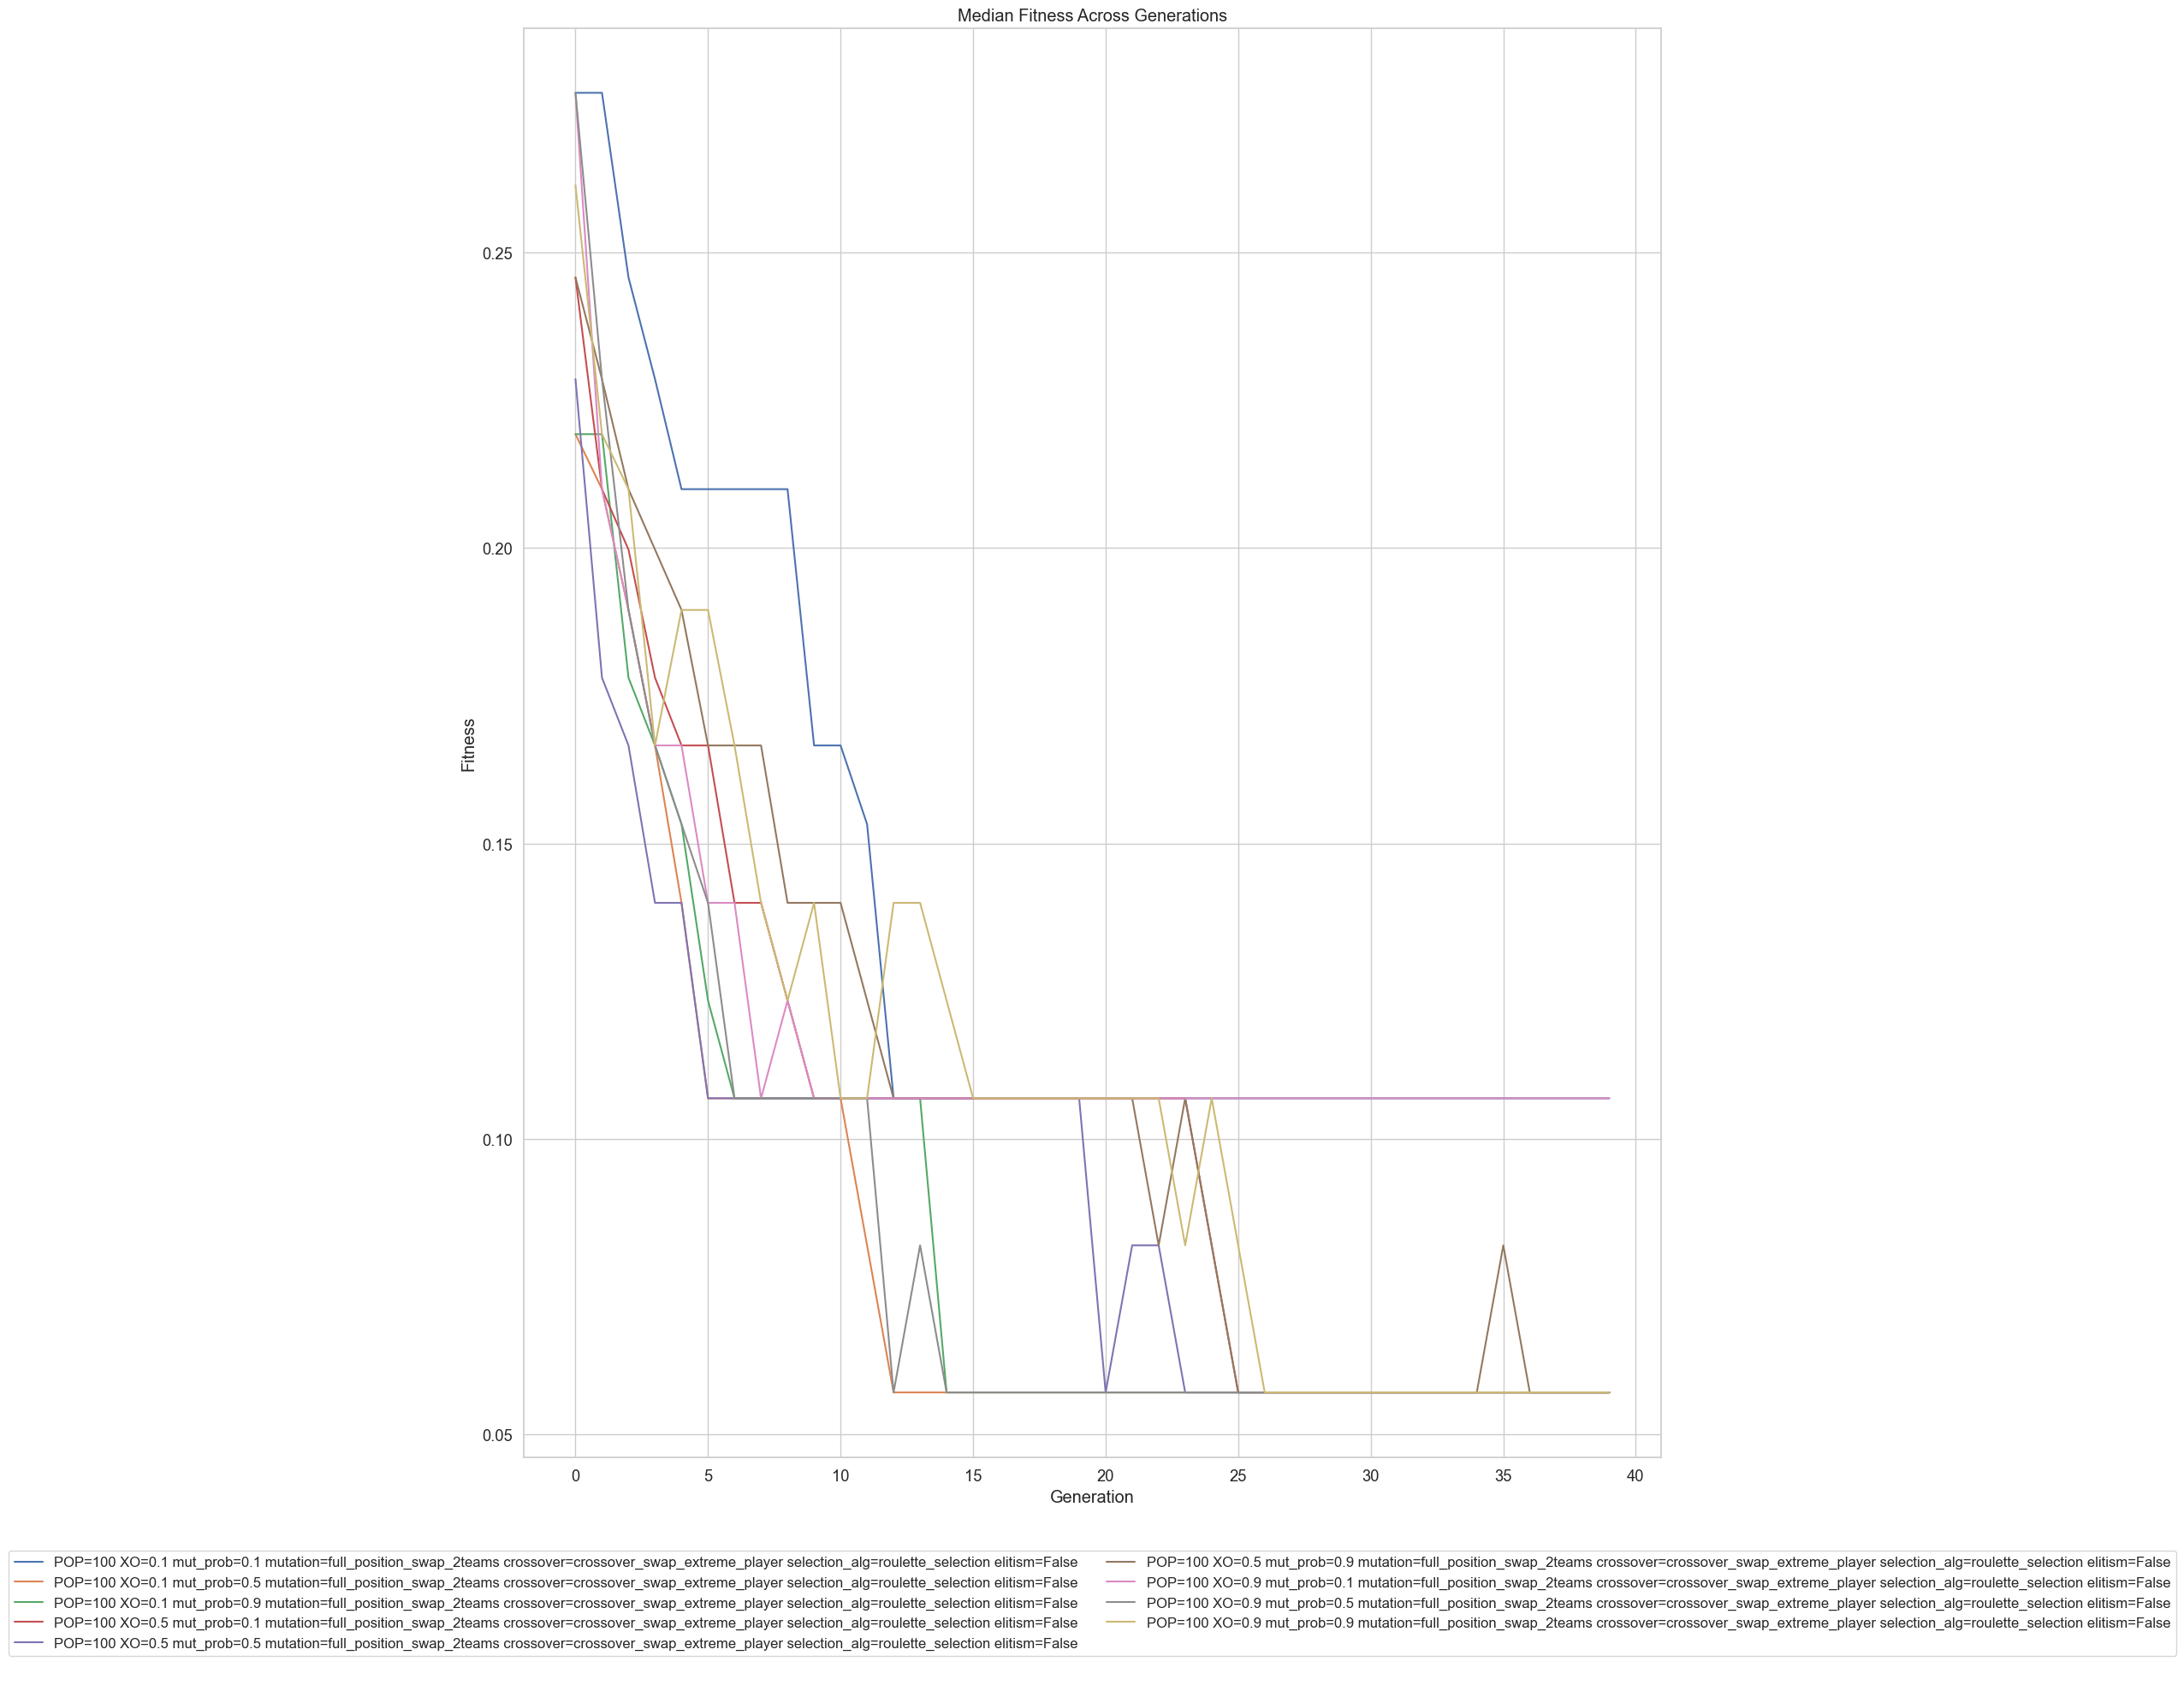

In [14]:
plot_median_fitness_over_gen(fitness_dfs, ncol=2)

**Key Observations:**
- Rapid convergence in the first 10 generations across most configurations.
- Stabilization suggests convergence to local optima.
- Best performance often achieved with moderate mutation (0.1–0.9), elitism, and roulette selection.
- Flat curves in later generations imply early stagnation and reduced diversity.

**Experimental Setup:**
- Population size: 40
- Mutation operator: full_position_swap_2teams
- Crossover operator: crossover_swap_extreme_player
- Selection method: roulette_selection
- Elitism: False

**Suggestions:**
- Consider adaptive mutation or diversity preservation.
- Test alternative selection methods (e.g., tournament).

Encourage exploration with delayed convergence strategies.

# CHECK THIS AGAIN WHEN THE GRID SEARCH ENDS


# 4. Statistical Significance Tests <a class="anchor" id="stat_tests"></a>

[Back to ToC](#toc)<br>

We use non-parametric statistical tests to evaluate performance differences. As we did in `evaluations_gsp1.ipynb`.

**Tests Used:**
- Friedman Test: Detects overall significant differences.

- Nemenyi Test: Post-hoc test for pairwise configuration comparisons.

**Interpretation:** 
- Null Hypothesis (H₀): All configurations perform equally.

- If p < 0.05, we reject H₀ — at least one configuration is significantly better.

In [15]:
labels, results = run_friedman_test_on_best_fitness(fitness_dfs)


Friedman Test Results:
Test Statistic: 45.2879
P-value:        0.0000
Significant difference detected between configurations (reject H₀)


In [16]:
posthoc_results = run_posthoc_nemenyi_from_best_fitness(labels, results)


Post-hoc Nemenyi Test (p-values):
                                                    POP=100 XO=0.1 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False  \
POP=100 XO=0.1 mut_prob=0.1 mutation=full_posit...                                             1.0000                                                                                                       
POP=100 XO=0.1 mut_prob=0.5 mutation=full_posit...                                             0.1138                                                                                                       
POP=100 XO=0.1 mut_prob=0.9 mutation=full_posit...                                             0.1208                                                                                                       
POP=100 XO=0.5 mut_prob=0.1 mutation=full_posit...                                             0.9327                                            

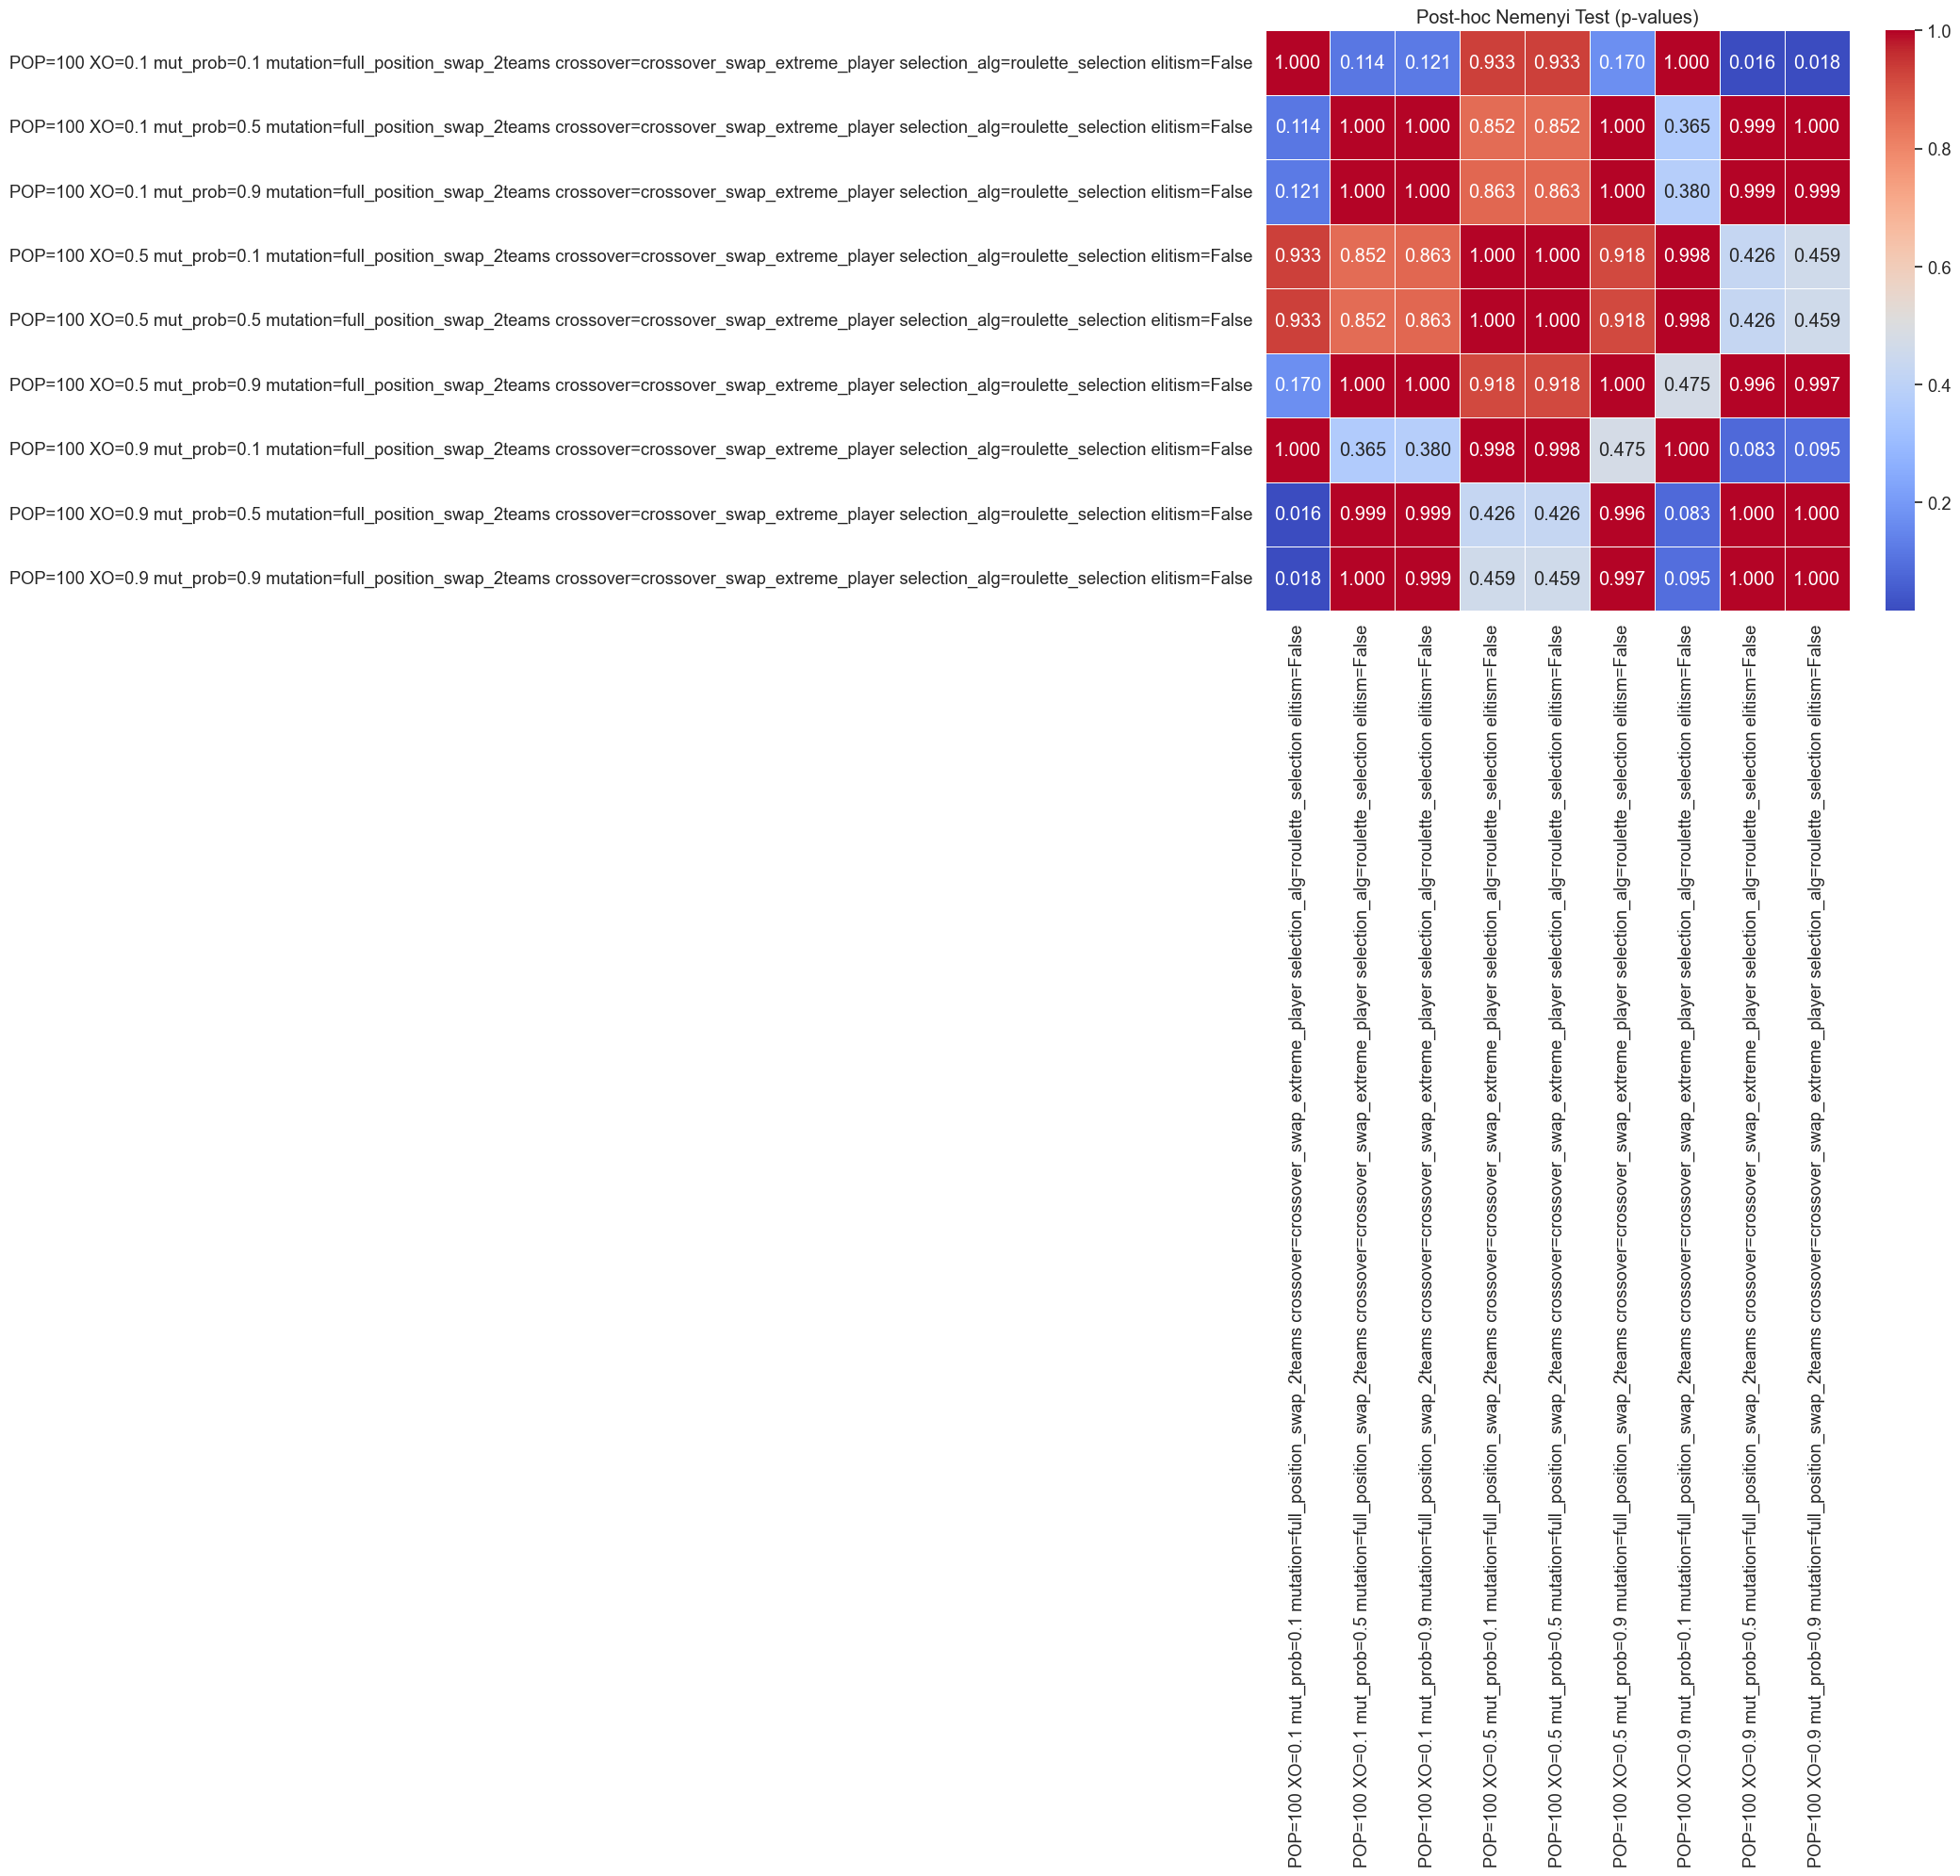

In [17]:
plot_posthoc_heatmap(posthoc_results)

In [18]:
summarize_significant_wins(posthoc_results)

,Significant Wins
POP=100 XO=0.1 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,2
POP=100 XO=0.9 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,1
POP=100 XO=0.9 mut_prob=0.9 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,1
POP=100 XO=0.1 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,0
POP=100 XO=0.1 mut_prob=0.9 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,0
POP=100 XO=0.5 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,0
POP=100 XO=0.5 mut_prob=0.5 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,0
POP=100 XO=0.5 mut_prob=0.9 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,0
POP=100 XO=0.9 mut_prob=0.1 mutation=full_position_swap_2teams crossover=crossover_swap_extreme_player selection_alg=roulette_selection elitism=False,0


The table gives a ranking based not just on performance, but on statistical confidence:
<br> Higher "Significant Wins" → more robust evidence that this configuration is truly better across multiple comparisons.
<br> Helps avoid picking a config just because of random variation in performance.

Config 1: It significantly beat 2 other configurations (with p < 0.05 in the Nemenyi test).

| XO Prob | Mut Prob | Significant Wins | Interpretation                                                                   |
| ------: | -------: | ---------------: | -------------------------------------------------------------------------------- |
|     0.1 |      0.1 |                2 | Very light crossover/mutation—steady but limited exploration yields few wins.    |
|     0.9 |      0.5 |                1 | Strong crossover with moderate mutation—mixes well but only occasional wins.     |
|     0.9 |      0.9 |                1 | Heavy crossover and heavy mutation—diverse but over-disruptive to converge.      |
|     0.1 |      0.5 |                0 | Low crossover with moderate mutation—insufficient recombination to win.          |
|     0.1 |      0.9 |                0 | Rare crossover but high mutation—random tweaks can’t compensate for no mixing.   |
|     0.5 |      0.1 |                0 | Mid-level crossover but light mutation—too conservative for consistent wins.     |
|     0.5 |      0.5 |                0 | Balanced mid-settings—not enough pressure either way to outperform rivals.       |
|     0.5 |      0.9 |                0 | Medium crossover but aggressive mutation—destabilizes good schemata too often.   |
|     0.9 |      0.1 |                0 | High crossover with light mutation—over-exploitation leads to premature lock-in. |


# 5. Analyzing Top Configurations <a class="anchor" id="top_configs"></a>

Let's analyze only the best-performing configurations from ga_summary_gs2.csv

## 5.1. Top by Median Fitness <a class="anchor" id="top_median_fitness"></a>
In this subsection, we analyze the top-performing configurations based on their median best fitness across all runs. The median provides a robust measure of central tendency, helping us identify configurations that consistently achieve low (better) fitness values while minimizing the impact of outliers or unstable runs.

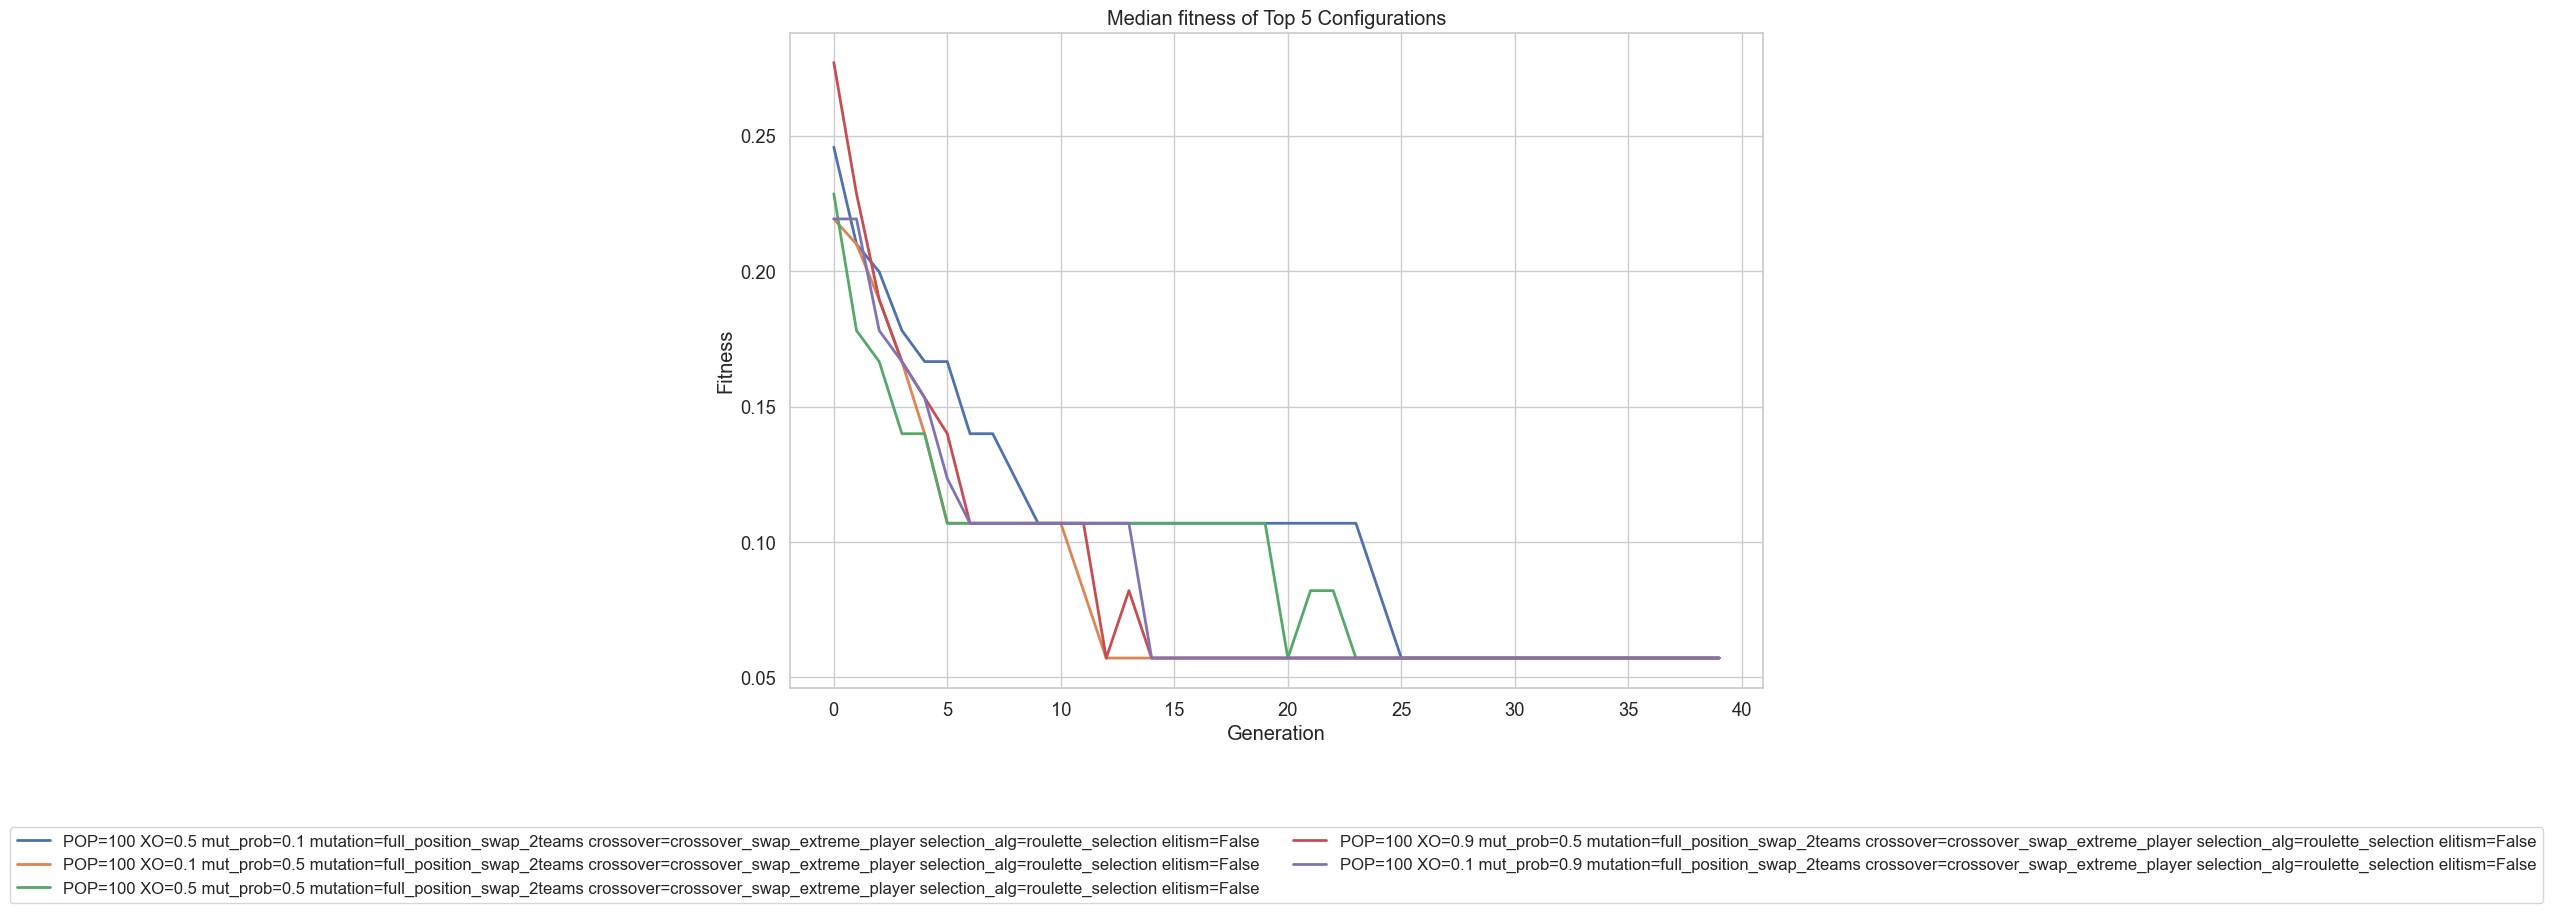

In [19]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=5, metric='median_fitness')

**Key Observations:**
- All configurations exhibit rapid convergence within the first 10 generations.

- The best configurations stabilize at a median fitness of ~0.06–0.07.

- Configurations with mut_prob = 1.0 tend to reach the lowest fitness levels quickest, suggesting higher mutation rates may improve exploration and lead to better optima.

- One or two configurations plateau higher (e.g. ~0.10), indicating early stagnation or suboptimal parameter settings.


## 5.2. Top by Standard Deviation Fitness <a class="anchor" id="top_std_fitness"></a>
Here, we focus on the consistency of each configuration by ranking them according to the standard deviation of their best fitness values. A lower standard deviation indicates that the configuration performs reliably across different seeds, while higher variance suggests instability or sensitivity to initialization.


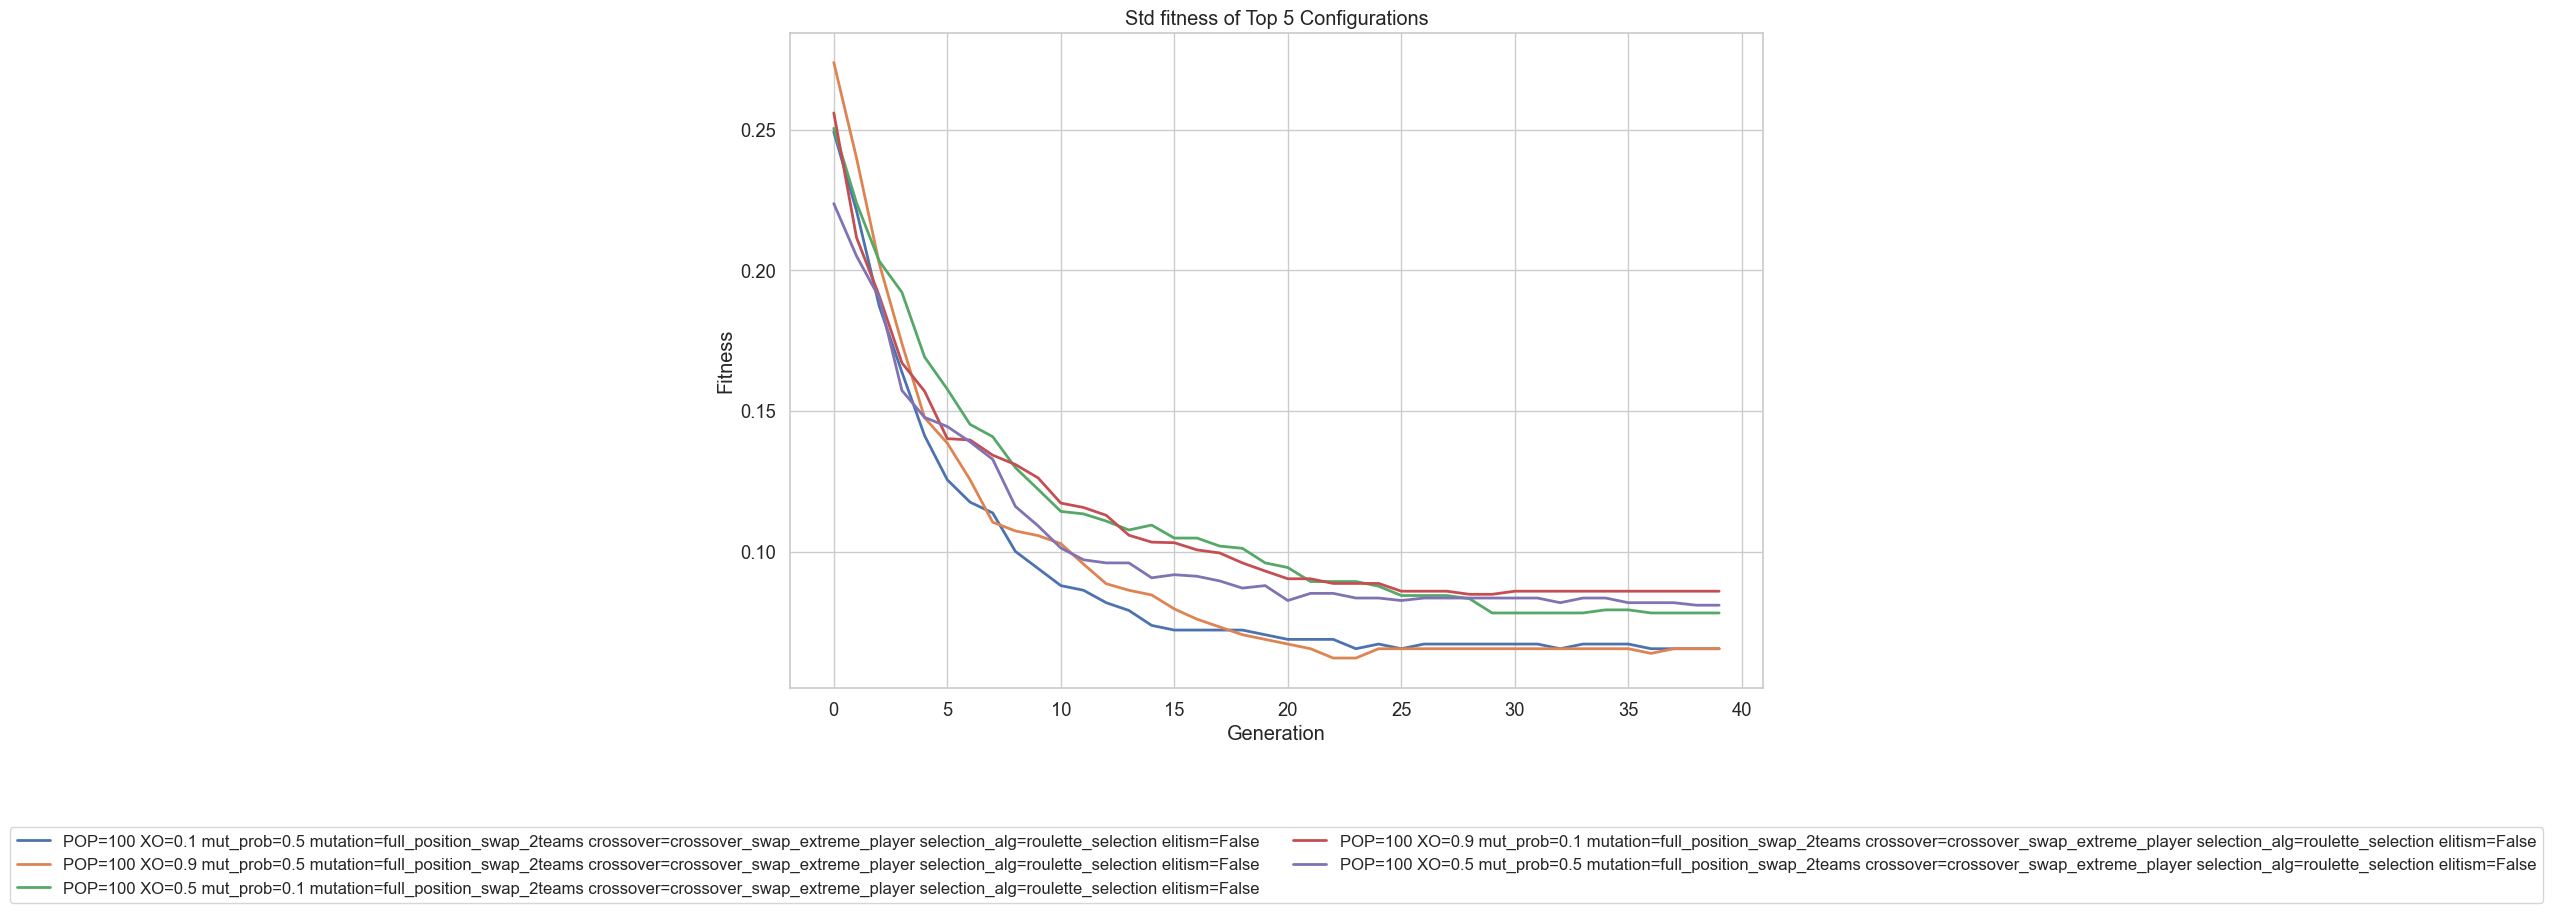

In [20]:
plot_top_configs(summary_path=summary_path,fitness_log_folder=fitness_path, top_n=5, metric="std_fitness")

**Key Observations:**
- All configurations start with high variance, reflecting high diversity in the initial population.

- As generations progress, standard deviation steadily decreases, which is expected as the population converges toward fitter solutions.

- Some configurations retain slightly higher diversity (e.g., blue and green lines), which can be advantageous to avoid premature convergence.

## 5.3. Boxplot of Best Fitness <a class="anchor" id="boxplot_best_fit"></a>
This section visualizes the distribution of best fitness scores for each configuration using boxplots. These plots allow us to compare performance spread, detect outliers, and better understand the reliability and robustness of each setup in reaching optimal solutions.

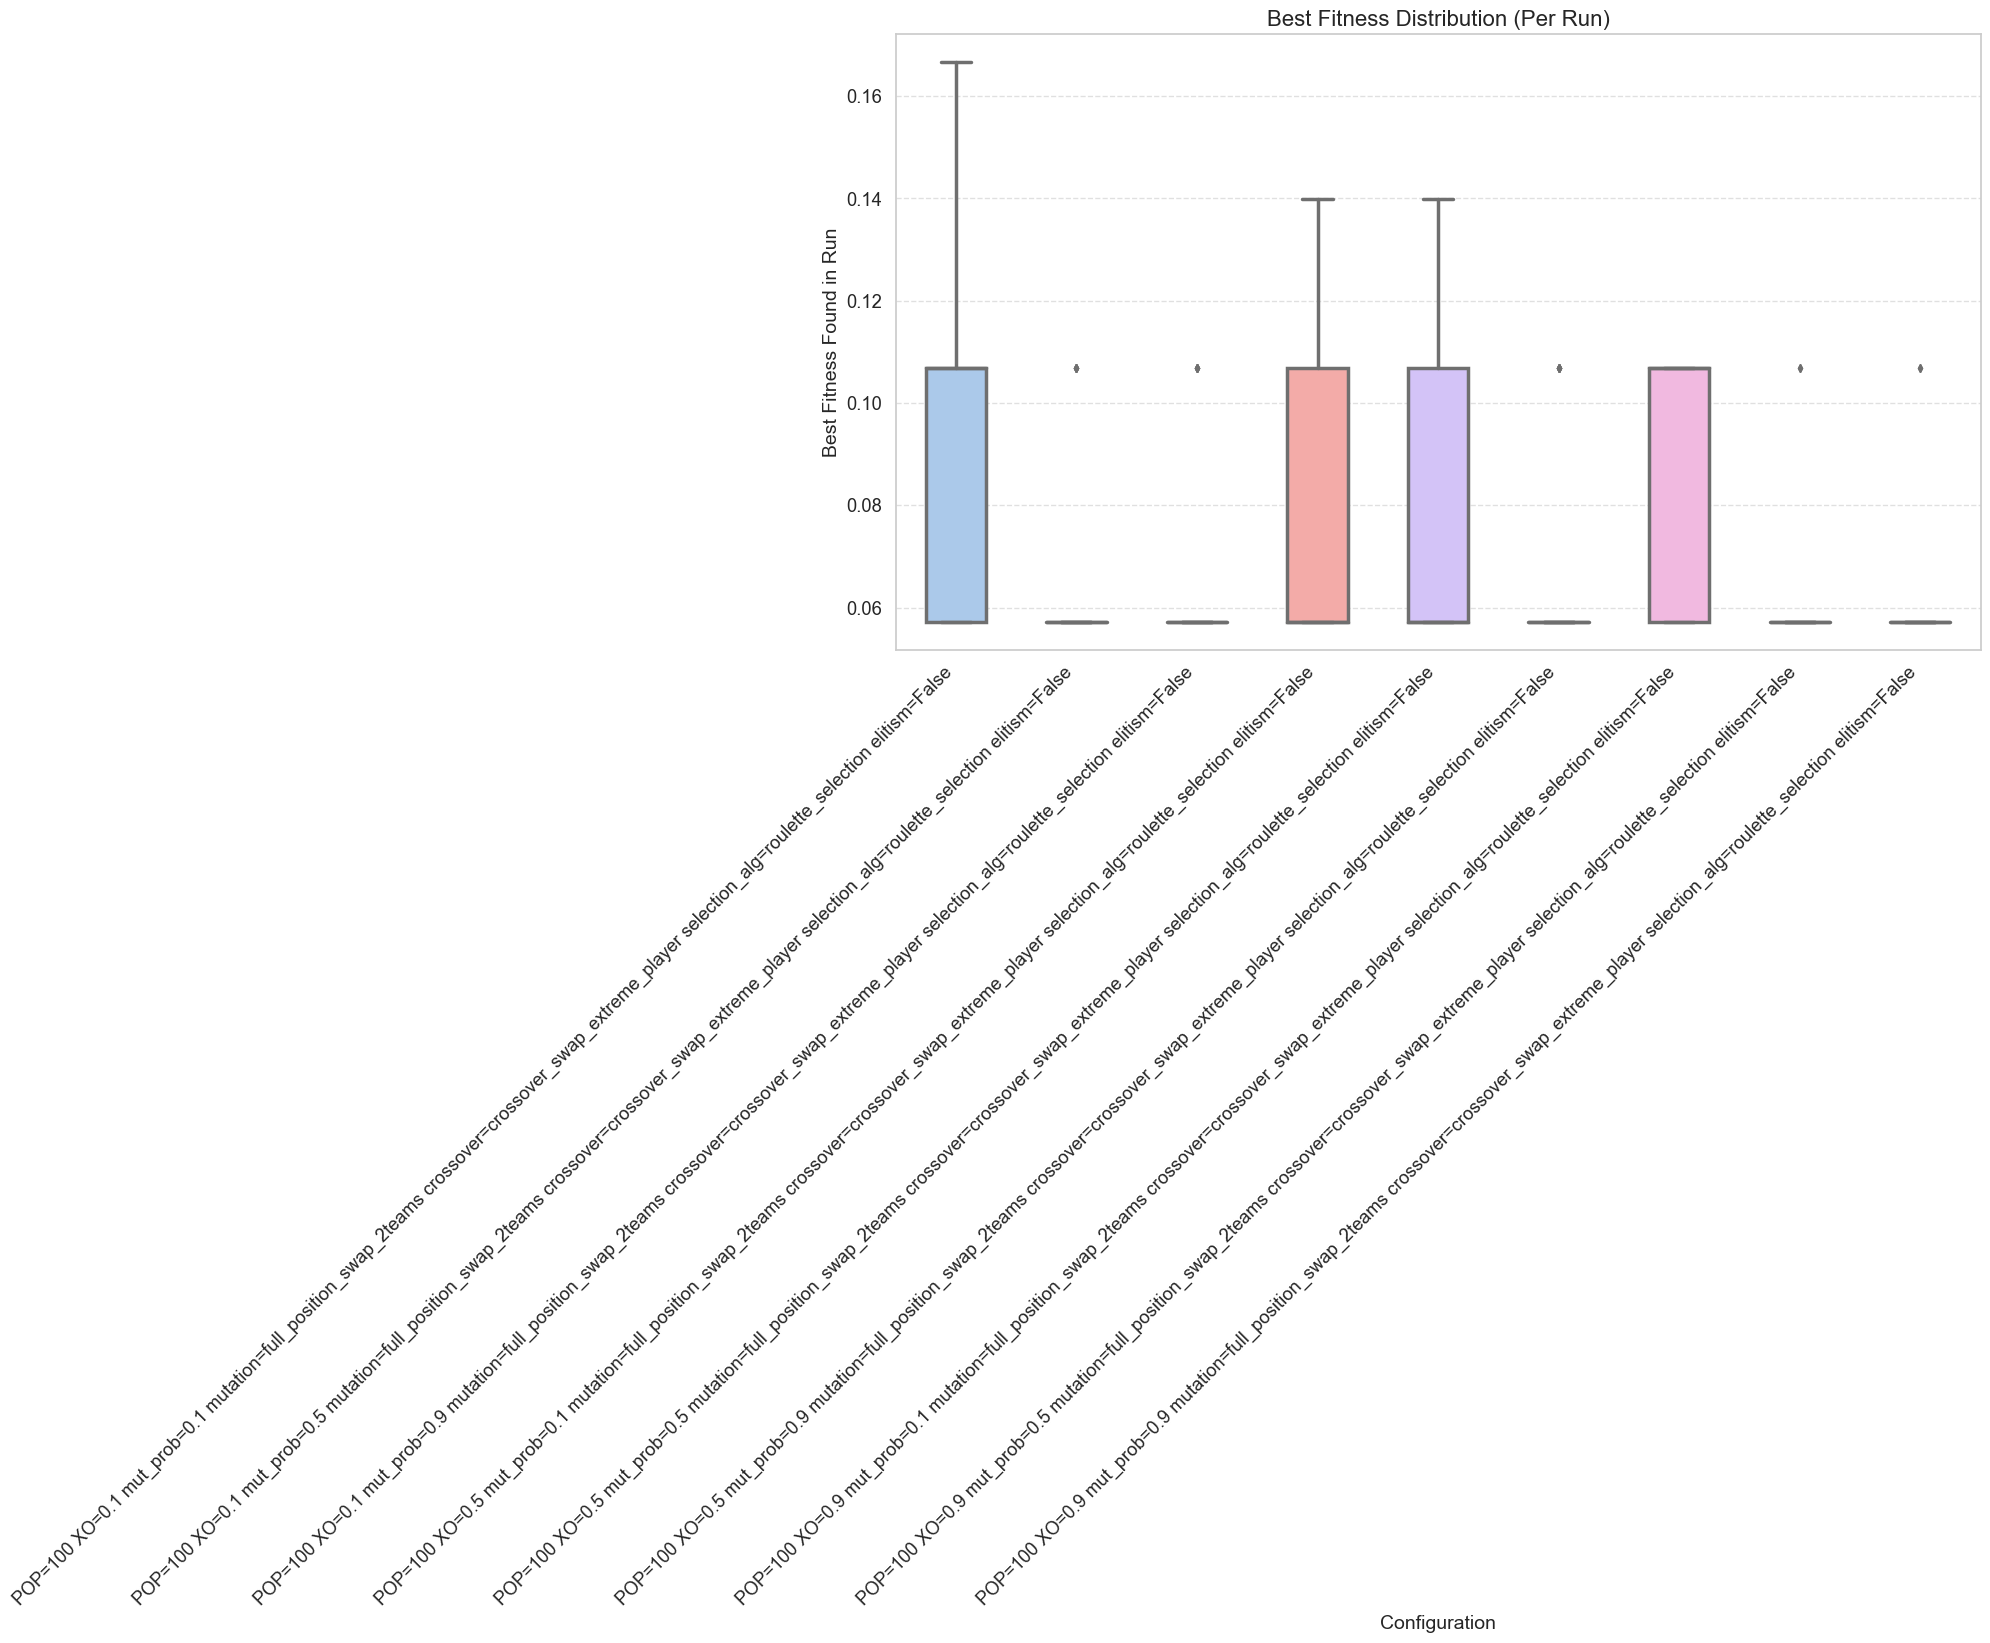

In [21]:
plot_best_fitness_boxplot(fitness_folder=fitness_path, title="Best Fitness Distribution (Per Run)")

# 6. Final Best Configuration <a class="anchor" id="final_config"></a>

Final Best Parameters Configuration

| Parameter           | Value                           |
| ------------------- | ------------------------------- |
| Population Size     | 100                             |
| Crossover Prob (XO) | **0.9**                         |
| Mutation Prob       | **0.5**                         |
| Mutation Operator   | `full_position_swap_2teams`     |
| Crossover Operator  | `crossover_swap_extreme_player` |
| Selection Algorithm | `roulette_selection`            |
| Elitism             | **False**                        |




**Final Remarks**
- This configuration outperformed the top configurations for convergence of standard deviation of fitness as well as median fitness outcomes across 30 runs

- It also achieved the 2. highest number of statistically significant wins in post hoc tests (1 win), demonstrating its ability to consistently outperform other setups across multiple runs.

This Parameter Configuration scored a fitness score of 0.057